In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SimpleLinearRegression import SimpleLinearRegression
%matplotlib inline

In [9]:
data = pd.read_csv('data-base.csv')

In [10]:
def f_calc(m):
    return m*9.80665
def k_calc(f, m):
    return f/m

def calc_forcas(massas):
    f = []
    for i in massas:
        f.append(f_calc(i))
    return f

def calc_ks(forcas,distancias):
    return np.divide(forcas,distancias)

In [11]:
data['Força (N)'] = calc_forcas(data['Massa (kg)'])
data['K(N/m)'] = calc_ks(data['Força (N)'],data['Distância (m)'])

data

,Distância (m),Massa (kg),Força (N),K(N/m)
0,0.0865,0.10,0.980665,11.337168
1,0.1015,0.15,1.470997,14.492586
2,0.1106,0.20,1.961330,17.733544
3,0.1279,0.25,2.451662,19.168589
4,0.1892,0.30,2.941995,15.549656
5,0.2695,0.35,3.432327,12.735909
6,0.2888,0.40,3.922660,13.582618
7,0.2425,0.45,4.412992,18.197907
8,0.3465,0.50,4.903325,14.151010
9,0.3225,0.55,5.393657,16.724519


In [12]:
X = data['Distância (m)']
Y = data['Força (N)']

datac = data.drop(['Massa (kg)','K(N/m)'], axis=1)

sr = SimpleLinearRegression()
sr.fit(X,Y)

sr.test_model()

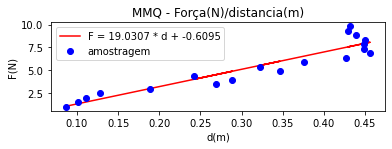

In [13]:
def plot_line(sr,title,label_x,label_y, line_l,value_l):
    x_values = sr.X
    y_values = [sr.predict([x]) for x in x_values]
    
    fig = plt.figure()
    fig.subplots_adjust(top=0.8)
    ax1 = fig.add_subplot(211)
    ax1.set_title(title)
    ax1.set_ylabel(label_y)
    ax1.set_xlabel(label_x)    
    
    line = ax1.plot(x_values,y_values,'r')
    values = ax1.plot(sr.X,sr.y,'bo')
    
    ax1.legend([line_l, value_l])
    
plot_line(sr,'MMQ - Força(N)/distancia(m)','d(m)','F(N)','F = 19.0307 * d + -0.6095','amostragem')

In [14]:
datac['y: Previsto'] = sr.predicts_
datac['y_r: Real '] = data['K(N/m)'] 

datac['(y- y_r)^2'] = sr.sqe_
datac['(y- y_m)^2'] = sr.sqt_
datac['[(y- y_m)^2 - (y- y_r)^2]'] = sr.sqr_

print("y = ax + b \n")

print("b = " + str(sr.intercept_[0]))
print("a = " + str(sr.coef_[0]))

print("\n")

print("SQT = " + str(sum(sr.sqt_)))
print("SQE = " + str(sum(sr.sqe_)))
print("SQR = " + str(sum(sr.sqr_)))

print("\n")

r2 = sum(sr.sqr_)/sum(sr.sqt_)
print("R = " + str(r2**0.5))
print("Coeficiente de correlação: " + str(r2))

datac

y = ax + b 

b = 19.03067172918777
a = -0.6095178162572035


SQT = 137.0427975170625
SQE = 16.797066932622002
SQR = 120.24573058444048


R = 0.9367133825948094
Coeficiente de correlação: 0.8774319611322098


,Distância (m),Força (N),y: Previsto,y_r: Real,(y- y_r)^2,(y- y_m)^2,[(y- y_m)^2 - (y- y_r)^2]
0,0.0865,0.980665,1.036635,11.337168,0.003133,1.947450e+01,19.471370
1,0.1015,1.470997,1.322095,14.492586,0.022172,1.538726e+01,15.365090
2,0.1106,1.961330,1.495274,17.733544,0.217208,1.178087e+01,11.563664
3,0.1279,2.451662,1.824505,19.168589,0.393326,8.655335e+00,8.262008
4,0.1892,2.941995,2.991085,15.549656,0.002410,6.010649e+00,6.008239
5,0.2695,3.432327,4.519248,12.735909,1.181397,3.846815e+00,2.665419
6,0.2888,3.922660,4.886540,13.582618,0.929065,2.163834e+00,1.234769
7,0.2425,4.412992,4.005420,18.197907,0.166115,9.617038e-01,0.795589
8,0.3465,4.903325,5.984610,14.151010,1.169177,2.404260e-01,-0.928751
9,0.3225,5.393657,5.527874,16.724519,0.018014,7.888609e-31,-0.018014
